In [107]:
def bit_flip_err(param):
    '''Generates bit-flip error operators
    Arguments:
        param [float]: parameter for bit-flip error
    Return: Kraus operator for bit-flip error
    '''

    from math import sqrt
    from qiskit.quantum_info import Kraus, Pauli, Operator
    
    return Kraus([sqrt(1-param)*Operator(Pauli('I')).data, sqrt(param)*Operator(Pauli('X')).data])

def phase_flip_err(param):
    '''Generates phase-flip error operators
    Arguments:
        param [float]: parameter for phase-flip error
    Return: Kraus operator for phase-flip error
    '''
    
    from math import sqrt
    from qiskit.quantum_info import Kraus, Pauli, Operator
    
    return Kraus([sqrt(1-param)*Operator(Pauli('I')).data, sqrt(param)*Operator(Pauli('Z')).data])

## Full Simulate with Pauli noise

In [108]:
from math import sqrt
from numpy.random import randint
from qiskit.quantum_info import DensityMatrix, Operator, Pauli

num_parties = [3, 4, 5, 6]

secret = list(randint(2, size = 10000))

Hadamard = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])

num_params = 11
err_list = {}
err_lQEC = {}
for num_party in num_parties:
    print(f'Running for {num_party}-party QSSCM...')
    err_list[num_party] = []
    err_lQEC[num_party] = []
    for param in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        print(f'\tRunning for param: {param}...', end = '\r')
        err = 0
        err_QEC = 0
        for s in secret:
            sec = []
            for rep in range(3):
                DM = DensityMatrix([1, 0])

                bob_rand = randint(4)
                match bob_rand:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('X')))
                    case 2:
                        DM = DM.evolve(Hadamard)
                    case 3:
                        DM = DM.evolve(Operator(Pauli('X'))).evolve(Hadamard)
                DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                charlie_rand = randint(3)
                match charlie_rand:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('Y')))
                    case 2:
                        DM = DM.evolve(Hadamard)
                DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                if num_party > 3:
                    dave_rand = randint(3)
                    match dave_rand:
                        case 0:
                            DM = DM.evolve(Operator(Pauli('I')))
                        case 1:
                            DM = DM.evolve(Operator(Pauli('Y')))
                        case 2:
                            DM = DM.evolve(Hadamard)
                    DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                    if num_party > 4:
                        eve_rand = randint(3)
                        match eve_rand:
                            case 0:
                                DM = DM.evolve(Operator(Pauli('I')))
                            case 1:
                                DM = DM.evolve(Operator(Pauli('Y')))
                            case 2:
                                DM = DM.evolve(Hadamard)
                        DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                        if num_party > 5:
                            zach_rand = randint(3)
                            match zach_rand:
                                case 0:
                                    DM = DM.evolve(Operator(Pauli('I')))
                                case 1:
                                    DM = DM.evolve(Operator(Pauli('Y')))
                                case 2:
                                    DM = DM.evolve(Hadamard)
                            DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                match s:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('Y')))
                DM = DM.evolve(bit_flip_err(param)).evolve(phase_flip_err(param))

                if num_party > 3:
                    if num_party > 4:
                        if num_party > 5:
                            match zach_rand:
                                case 0:
                                    DM = DM.evolve(Operator(Pauli('I')))
                                case 1:
                                    DM = DM.evolve(Operator(Pauli('Y')))
                                case 2:
                                    DM = DM.evolve(Hadamard)

                        match eve_rand:
                            case 0:
                                DM = DM.evolve(Operator(Pauli('I')))
                            case 1:
                                DM = DM.evolve(Operator(Pauli('Y')))
                            case 2:
                                DM = DM.evolve(Hadamard)
                    
                    match dave_rand:
                        case 0:
                            DM = DM.evolve(Operator(Pauli('I')))
                        case 1:
                            DM = DM.evolve(Operator(Pauli('Y')))
                        case 2:
                            DM = DM.evolve(Hadamard)

                match charlie_rand:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('Y')))
                    case 2:
                        DM = DM.evolve(Hadamard)

                match bob_rand:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('X')))
                    case 2:
                        DM = DM.evolve(Hadamard)
                    case 3:
                        DM = DM.evolve(Hadamard).evolve(Operator(Pauli('X')))

                sec.append(int(DM.measure()[0]))
            
            if s != sec[0]:
                err += 1
                
            sec = (sec[0] and sec[1]) or (sec[1] and sec[2]) or (sec[2] and sec[0])
            
            if s != sec:
                err_QEC += 1
                
        err_lQEC[num_party].append(err_QEC/len(secret))
        err_list[num_party].append(err/len(secret))
    print()

print(err_list)
print(err_lQEC)

Running for 3-party QSSCM...
	Running for param: 1.0....
Running for 4-party QSSCM...
	Running for param: 1.0....
Running for 5-party QSSCM...
	Running for param: 1.0....
Running for 6-party QSSCM...
	Running for param: 1.0....
{3: [0.0, 0.1369, 0.2476, 0.3293, 0.3879, 0.435, 0.4669, 0.4993, 0.4998, 0.5019, 0.5288, 0.5692, 0.6059, 0.6709, 0.7699, 0.8638, 1.0], 4: [0.0, 0.1725, 0.304, 0.386, 0.4268, 0.473, 0.4913, 0.4941, 0.4981, 0.495, 0.4806, 0.4699, 0.4398, 0.3861, 0.2967, 0.1682, 0.0], 5: [0.0, 0.2029, 0.3392, 0.4195, 0.4663, 0.4794, 0.4954, 0.4969, 0.5094, 0.4972, 0.5153, 0.5167, 0.536, 0.5815, 0.6705, 0.7949, 1.0], 6: [0.0, 0.2306, 0.3624, 0.4312, 0.4794, 0.4939, 0.5056, 0.4987, 0.5084, 0.4866, 0.4975, 0.4862, 0.4727, 0.4389, 0.3728, 0.2362, 0.0]}
{3: [0.0, 0.0491, 0.1456, 0.2494, 0.3322, 0.4044, 0.4522, 0.4981, 0.5046, 0.4963, 0.5443, 0.5969, 0.6623, 0.747, 0.8541, 0.9474, 1.0], 4: [0.0, 0.0781, 0.2147, 0.3264, 0.4033, 0.4469, 0.4806, 0.4923, 0.4996, 0.4976, 0.4847, 0.4597, 0.404

In [109]:
err = {}
erq = {}
for num_party in num_parties:
    err[num_party] = []
    erq[num_party] = []
    for param in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        err[num_party].append(0.5*(1-(1-2*param)**num_party))
        erq[num_party].append(3*err[num_party][-1]**2*(1-err[num_party][-1])+err[num_party][-1]**3)

print(err)
print(erq)

{3: [0.0, 0.13549999999999995, 0.24399999999999994, 0.3285, 0.392, 0.4375, 0.46799999999999997, 0.496, 0.5, 0.504, 0.532, 0.5625, 0.6080000000000001, 0.6715, 0.756, 0.8644999999999998, 1.0], 4: [0.0, 0.17195, 0.29519999999999996, 0.37995, 0.43520000000000003, 0.46875, 0.4872, 0.4992, 0.5, 0.4992, 0.4872, 0.46875, 0.4352, 0.37995, 0.29519999999999996, 0.1719500000000001, 0.0], 5: [0.0, 0.20475499999999996, 0.33615999999999996, 0.41596500000000003, 0.46112000000000003, 0.484375, 0.49488, 0.49984, 0.5, 0.50016, 0.50512, 0.515625, 0.53888, 0.584035, 0.66384, 0.7952449999999999, 1.0], 6: [0.0, 0.23427949999999997, 0.3689279999999999, 0.4411755, 0.476672, 0.4921875, 0.497952, 0.499968, 0.5, 0.499968, 0.497952, 0.4921875, 0.476672, 0.4411755, 0.3689279999999999, 0.23427950000000014, 0.0]}
{3: [0.0, 0.05010512224999997, 0.1495544319999999, 0.25283840175, 0.34051942400000007, 0.40673828125, 0.45206553599999993, 0.494000128, 0.5, 0.5059998720000001, 0.5479344640000001, 0.59326171875, 0.659480576

In [110]:
from matplotlib.pyplot import rcParams, tick_params
from matplotlib import rc

SIZE = 10
rc('font', size = SIZE)
rc('axes', titlesize = SIZE)
rcParams["figure.figsize"] = (13, 10)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']

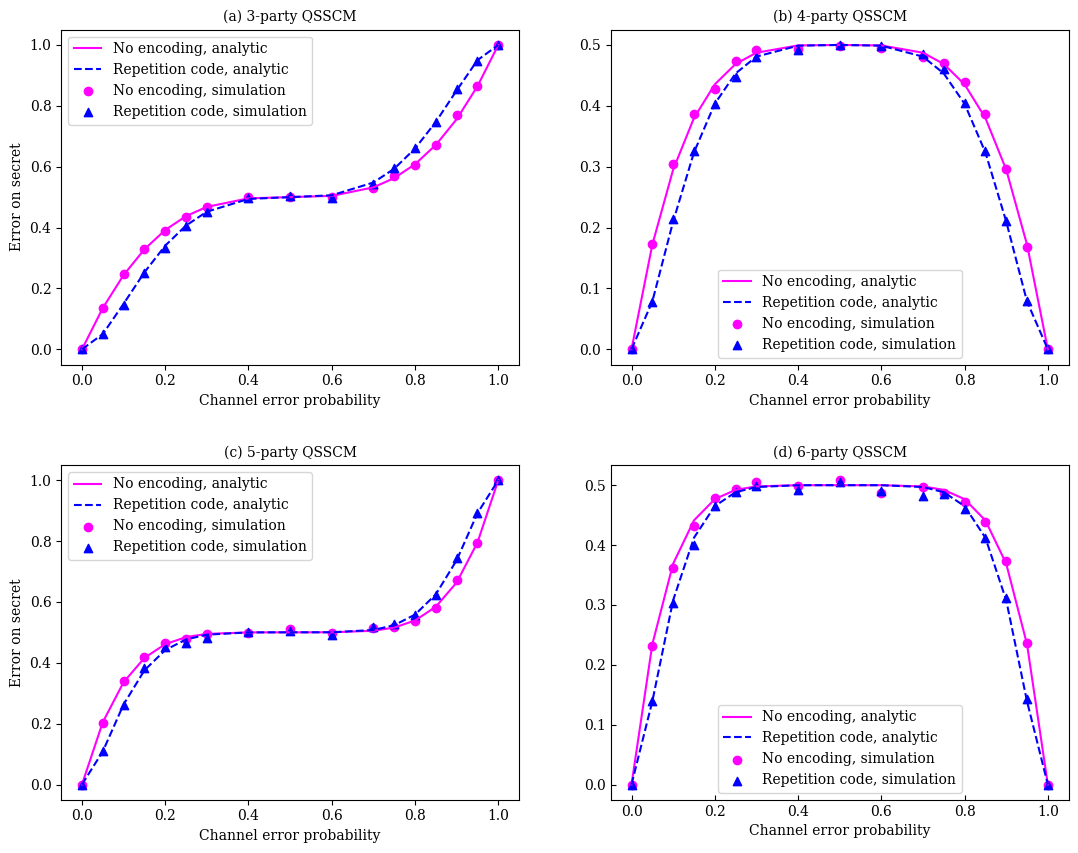

In [111]:
from matplotlib.pyplot import subplots, legend, show, savefig, subplots_adjust, tick_params

fig, ax = subplots(2, 2)

subplots_adjust(hspace = 0.3)

ax[0, 0].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err[3], label = r'No encoding, analytic', color = '#f0f')
ax[0, 0].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], erq[3], label = r'Repetition code, analytic', ls = '--', color = '#00f')
ax[0, 0].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_list[3], label = r'No encoding, simulation', marker = 'o', color = '#f0f')
ax[0, 0].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_lQEC[3], label = r'Repetition code, simulation', marker = '^', color = '#00f')

ax[0, 0].set_xlabel(r'Channel error probability')
ax[0, 0].set_ylabel(r'Error on secret')

ax[0, 0].legend()

ax[0, 0].set_title('(a) 3-party QSSCM')

ax[0, 1].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err[4], label = r'No encoding, analytic', color = '#f0f')
ax[0, 1].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], erq[4], label = r'Repetition code, analytic', ls = '--', color = '#00f')
ax[0, 1].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_list[4], label = r'No encoding, simulation', marker = 'o', color = '#f0f')
ax[0, 1].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_lQEC[4], label = r'Repetition code, simulation', marker = '^', color = '#00f')

ax[0, 1].set_xlabel(r'Channel error probability')

ax[0, 1].legend()

ax[0, 1].set_title('(b) 4-party QSSCM')

ax[1, 0].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err[5], label = r'No encoding, analytic', color = '#f0f')
ax[1, 0].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], erq[5], label = r'Repetition code, analytic', ls = '--', color = '#00f')
ax[1, 0].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_list[5], label = r'No encoding, simulation', marker = 'o', color = '#f0f')
ax[1, 0].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_lQEC[5], label = r'Repetition code, simulation', marker = '^', color = '#00f')

ax[1, 0].set_xlabel(r'Channel error probability')
ax[1, 0].set_ylabel(r'Error on secret')

ax[1, 0].legend()

ax[1, 0].set_title('(c) 5-party QSSCM')

ax[1, 1].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err[6], label = r'No encoding, analytic', color = '#f0f')
ax[1, 1].plot([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], erq[6], label = r'Repetition code, analytic', ls = '--', color = '#00f')
ax[1, 1].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_list[6], label = r'No encoding, simulation', marker = 'o', color = '#f0f')
ax[1, 1].scatter([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], err_lQEC[6], label = r'Repetition code, simulation', marker = '^', color = '#00f')

ax[1, 1].set_xlabel(r'Channel error probability')

ax[1, 1].legend()

ax[1, 1].set_title('(d) 6-party QSSCM')

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig("rep_flip.png", format="png", bbox_inches="tight")

show()

## Amplitude-damping (non-uniform) noise

In [20]:
from matplotlib.pyplot import rcParams, tick_params
from matplotlib import rc

SIZE = 25
rc('font', size = SIZE)
rc('axes', titlesize=SIZE)
rcParams["figure.figsize"] = (13, 10)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']

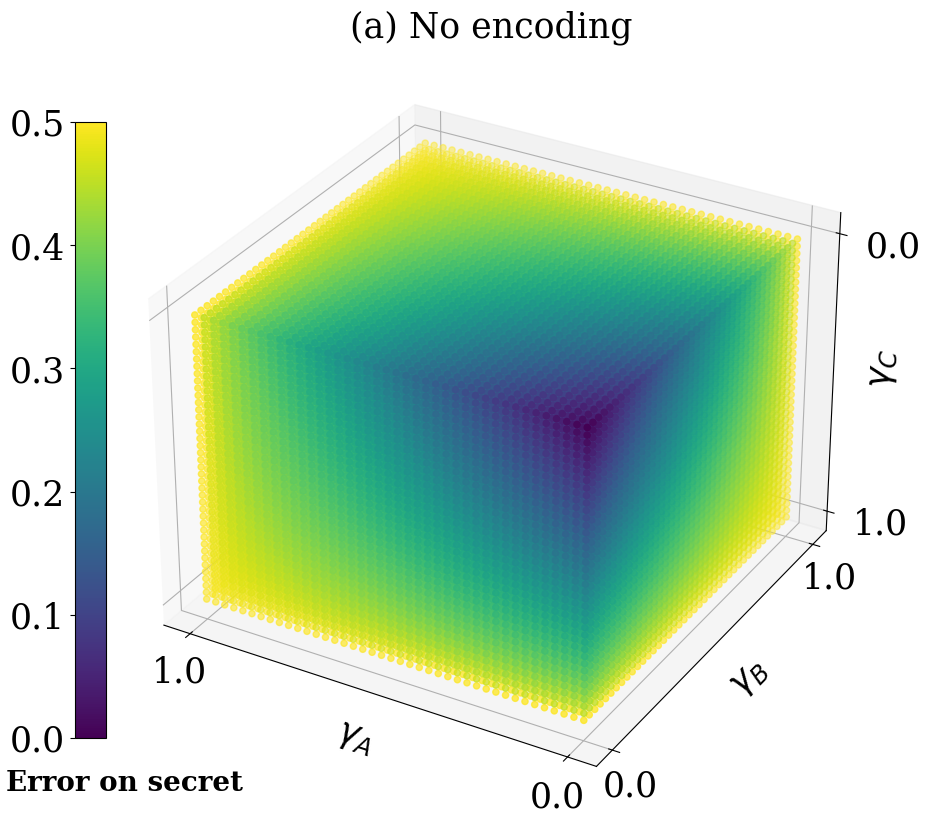

In [21]:
from matplotlib.pyplot import figure, xticks, yticks, show, savefig, tick_params
from numpy import linspace, meshgrid, sqrt

x = y = z = linspace(0, 1, 41)
A, B, C = meshgrid(x, y, z)
values = (4+2*(A+B+C)-2*(A*B+B*C+C*A)+2*A*B*C-(1-A)*(1-C)*sqrt(1-B)-(1-B)*sqrt((1-A)*(1-C))-2*sqrt((1-A)*(1-B)*(1-C)))/12

fig = figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(A[::-1], B, C, c = [[x[::-1] for x in y][::-1] for y in values])
cbar = fig.colorbar(scatter, location='left', shrink = 0.8, pad = 0)
# cbar.ax.set_yticklabels(['0.0', '0.25', '0.5'], fontsize = 25)
xticks([0, 1])
ax.set_xticklabels(['1.0', '0.0'], fontsize = 25)
yticks([0, 1])
ax.set_yticklabels(['0.0', '1.0'], fontsize = 25)
ax.set_zticks([0, 1])
ax.set_zticklabels(['1.0', '0.0'], ha = 'left', fontsize = 25)

ax.set_xlabel(r'$\gamma_A$', labelpad = 1, fontsize = 25)
ax.set_ylabel(r'$\gamma_B$', labelpad = 1, fontsize = 25)
ax.set_zlabel(r'$\gamma_C$', labelpad = 1, fontsize = 25)

ax.text(-0.35, -0.35, -0.6, r'Error on secret', weight = 'bold', fontsize = 20)

ax.set_title('(a) No encoding')

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig("err_amp_gen.png", format = "png", bbox_inches = "tight")

show()

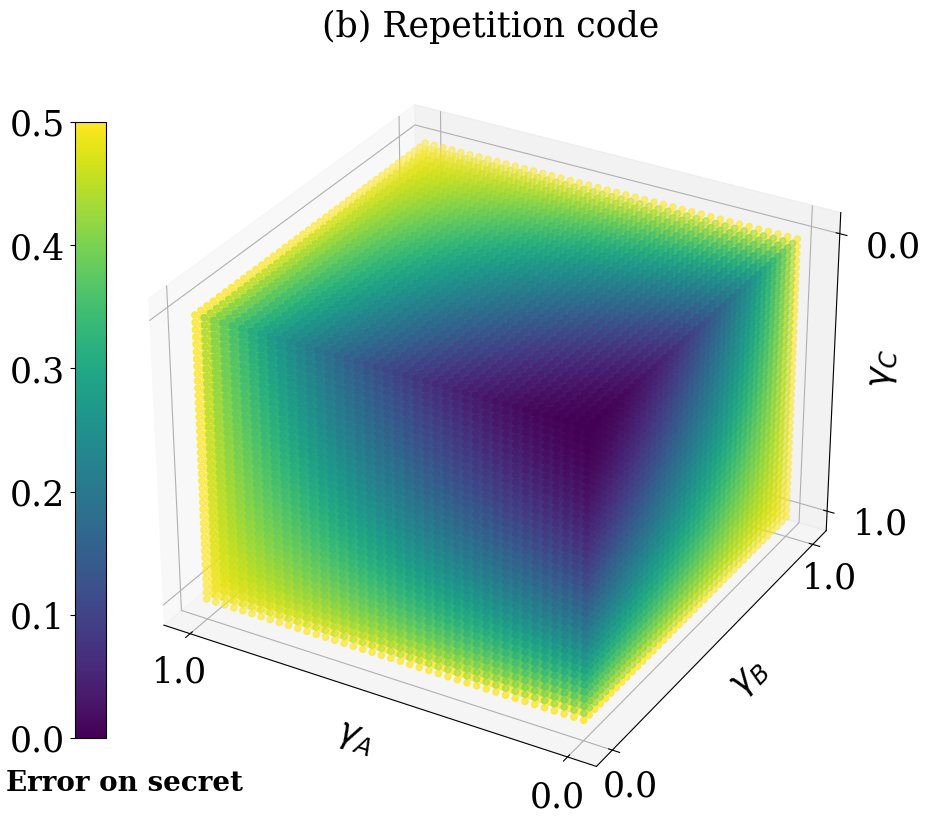

In [22]:
from matplotlib.pyplot import figure, xticks, yticks, show, savefig, tick_params
from numpy import linspace, meshgrid, sqrt

x = y = z = linspace(0, 1, 41)
A, B, C = meshgrid(x, y, z)
values = (4+2*(A+B+C)-2*(A*B+B*C+C*A)+2*A*B*C-(1-A)*(1-C)*sqrt(1-B)-(1-B)*sqrt((1-A)*(1-C))-2*sqrt((1-A)*(1-B)*(1-C)))/12
values = 3*values**2*(1-values)+values**3

fig = figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(A[::-1], B, C, c = [[x[::-1] for x in y][::-1] for y in values])
cbar = fig.colorbar(scatter, location='left', shrink = 0.8, pad = 0)
xticks([0, 1])
ax.set_xticklabels(['1.0', '0.0'], fontsize = 25)
yticks([0, 1])
ax.set_yticklabels(['0.0', '1.0'], fontsize = 25)
ax.set_zticks([0, 1])
ax.set_zticklabels(['1.0', '0.0'], ha = 'left', fontsize = 25)

ax.set_xlabel(r'$\gamma_A$', labelpad = 1, fontsize = 25)
ax.set_ylabel(r'$\gamma_B$', labelpad = 1, fontsize = 25)
ax.set_zlabel(r'$\gamma_C$', labelpad = 1, fontsize = 25)

ax.text(-0.35, -0.35, -0.6, r'Error on secret', weight = 'bold', fontsize = 20)

ax.set_title('(b) Repetition code')

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig("QEC_amp_gen.png", format = "png", bbox_inches = "tight")

show()

## Noise Simulation
Simulating following noises:
1. Bit-flip [X]
2. Phase-flip (Dephasing) [Z]
3. Pauli [P]
4. Depolarizing [D]
5. Amplitude-damping [AD]
6. Phase-amplitude-damping [AP/PA]
7. Amplitude damping + Depolarizing [DA]
8. Generalized Pauli [G]

In [68]:
def get_noise(noise_type: str, param: float | tuple, num_qubits: int = 1):
    '''
    Generates Phase-Amplitude Damping noise operators
    Arguments:
        noise_type: Noise types from ['X', 'Z', 'P', 'D', 'AD', 'PA', 'AP', 'DA', 'G'] for bit-flip, phase-flip, depolarizing, amplitude-damping,
                      phase-amplitude damping, generalized channel: E(ρ) = (1−p)ρ + p_x*XρX + p_y*YρY + p_z*ZρZ, respectively
        param: parameter for noise
        num_qubits: Number of qubits noise to be applied
    Return: Kraus operator for noise
    '''
    
    from math import sqrt
    from numpy import eye, zeros
    from qiskit.quantum_info import Kraus, Pauli, Operator

    _ATOL = 1e-15

    match noise_type:
        case 'X':
            # p_x = param
            E = Kraus([sqrt(1+_ATOL-param)*Operator(Pauli('I')).data, sqrt(param)*Operator(Pauli('X')).data])
        case 'Z':
            # p_z = param
            E = Kraus([sqrt(1+_ATOL-param)*Operator(Pauli('I')).data, sqrt(param)*Operator(Pauli('Z')).data])
        case 'P':
            # p = param
            E = Kraus([(1+_ATOL-param)*Operator(Pauli('I')).data, sqrt(param*(1+_ATOL-param))*Operator(Pauli('X')).data,
                       param*Operator(Pauli('Y')).data, sqrt(param*(1+_ATOL-param))*Operator(Pauli('Z')).data])
        case 'D':
            # p_dep = param
            E = Kraus([sqrt(1+_ATOL-param)*Operator(Pauli('I')).data, sqrt(param/3)*Operator(Pauli('X')).data,
                       sqrt(param/3)*Operator(Pauli('Y')).data, sqrt(param/3)*Operator(Pauli('Z')).data])
        case 'G':
            # p_x, p_y, p_z = param
            E = Kraus([sqrt(1+_ATOL-sum(param))*Operator(Pauli('I')).data, sqrt(param[0])*Operator(Pauli('X')).data,
                       sqrt(param[1])*Operator(Pauli('Y')).data, sqrt(param[2])*Operator(Pauli('Z')).data])
        case 'AD':
            # gamma = param
            E = [eye(2), zeros((2, 2))]
            
            E[0][1][1] = sqrt(1+_ATOL-param)
            E[1][0][1] = sqrt(param)

            E = Kraus(E)
        case 'PA':
            # gamma, lambda = param
            E = [eye(2), zeros((2, 2)), eye(2), zeros((2, 2))]
    
            E[0][0][0] = sqrt(1+_ATOL-param[1])
            E[0][1][1] = sqrt((1+_ATOL-param[1])*(1+_ATOL-param[0]))
            
            E[1][0][1] = sqrt(param[0]*(1+_ATOL-param[1]))
            
            E[2][0][0] = sqrt(param[1])
            E[2][1][1] = -sqrt(param[1]*(1+_ATOL-param[0]))
            
            E[3][0][1] = sqrt(param[0]*param[1])

            E = Kraus(E)
        case 'AP':
            # gamma, lambda = param
            E = [eye(2), zeros((2, 2)), eye(2), zeros((2, 2))]
    
            E[0][0][0] = sqrt(1+_ATOL-param[1])
            E[0][1][1] = sqrt((1+_ATOL-param[1])*(1+_ATOL-param[0]))
            
            E[1][0][1] = sqrt(param[0]*(1+_ATOL-param[1]))
            
            E[2][0][0] = sqrt(param[1])
            E[2][1][1] = -sqrt(param[1]*(1+_ATOL-param[0]))
            
            E[3][0][1] = -sqrt(param[0]*param[1])

            E = Kraus(E)
        case 'DA':
            # gamma, p_amp, p_dep = param
            E = [eye(2), eye(2), zeros((2, 2)), zeros((2, 2)), zeros((2, 2)), zeros((2, 2))]
            
            E[0] = sqrt(1+_ATOL-param[1]-param[2])*E[0]
    
            E[1][0][0] = sqrt(param[1])
            E[1][1][1] = sqrt(param[1]*(1-param[0]))
            
            E[2][0][1] = sqrt(param[0]*param[1])
            
            E[3][0][1] = sqrt(param[2]/3)
            E[3][1][0] = sqrt(param[2]/3)
            
            E[4][0][1] = sqrt(param[2]/3)
            E[4][1][0] = -sqrt(param[2]/3)
            
            E[5][0][0] = sqrt(param[2]/3)
            E[5][1][1] = -sqrt(param[2]/3)

            E = Kraus(E)
        case default:
            raise NotImplementedError('Error type is not been implemented yet.')
        
    E1 = E.copy()
    
    for _ in range(num_qubits-1):
        E = E.expand(E1)
    
    
    
    return Kraus(E)

In [62]:
def plot1D(params: list, err: tuple, xlabel: str, ylabel: str, filename: str):
	'''
	Plots the error data
	Arguments:
		params: Noise parameters
		err: Error values
		xlabel: Label for X axis
		ylabel: Label for Y axis
		filename: File to save picture
	Return: None
	'''
	from matplotlib.pyplot import subplots, savefig, subplots_adjust, rcParams
	from matplotlib import rc
	from string import ascii_lowercase

	# Configure plotting parameters
	SIZE = 10
	rc('font', size = SIZE)
	rc('axes', titlesize=SIZE)
	rcParams["figure.figsize"] = (13, 10)
	rcParams['font.family'] = 'serif'
	rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']

	damp_err_list, damp_err_lQEC = err	# Unpack error
	num_parties = list(damp_err_list.keys())

	# Initialize subplot
	_, ax = subplots(2, 2)
	subplots_adjust(hspace = 0.25)

	for key, letter in zip(num_parties, ascii_lowercase):
		ax[(key-3)//2, (key-3)%2].plot(params, damp_err_list[key], label = r'No encoding', color = '#f0f')
		ax[(key-3)//2, (key-3)%2].plot(params, damp_err_lQEC[key], label = r'Repetition code', color = '#00f', ls = '--')

		ax[(key-3)//2, (key-3)%2].set_xlabel(xlabel)
		ax[(key-3)//2, (key-3)%2].set_ylabel(ylabel)

		ax[(key-3)//2, (key-3)%2].legend()

		ax[(key-3)//2, (key-3)%2].set_title(f'({letter}) {key}-party QSSCM')

		ax[(key-3)//2, (key-3)%2].tick_params(axis = 'both', which = 'both', direction = 'in')

		# if filename[4:] == 'dep.png':
		# Find the first point where Repetition code fails
		for eq, a, b in zip(params, damp_err_list[key], damp_err_lQEC[key]):
			if abs(a-b)<0.0035 and eq != 0:
				break
		
		# Draw a vertical line at this point
		ax[(key-3)//2, (key-3)%2].axvline(x = eq, color = 'g', linestyle = ':')

	savefig(filename, format="png", bbox_inches="tight")

In [72]:
def plot2D(params: list, err: tuple, xlabel0: str, xlabel1: str, ylabel: str, filename: str):
	'''
	Plots the error data
	Arguments:
		params: Noise parameters
		err: Error values
		xlabel0: Label for X axis on left plot
		xlabel1: Label for X axis on right plot
		ylabel: Label for Y axis
		filename: File to save picture
	Return: None
	'''
	from string import ascii_lowercase
	from numpy import meshgrid, array
	from matplotlib import rc
	from matplotlib.patches import Patch
	from matplotlib.pyplot import subplots, savefig, subplots_adjust, rcParams

	# Configure plotting parameters
	SIZE = 10
	rc('font', size = SIZE)
	rc('axes', titlesize=SIZE)
	rcParams["figure.figsize"] = (13, 5)
	rcParams['font.family'] = 'serif'
	rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']
	# rcParams.update({'xtick.labelsize':15})

	# Convert to numpy arrays and reshape
	fix_params = [0.0, 0.1, 0.3]
	AD_err_list = {0.0: [], 0.1: [], 0.3: []}
	AD_err_lQEC = {0.0: [], 0.1: [], 0.3: []}
	PD_err_list = {0.0: [], 0.1: [], 0.3: []}
	PD_err_lQEC = {0.0: [], 0.1: [], 0.3: []}
	param_AD = {0.0: [], 0.1: [], 0.3: []}
	param_PD = {0.0: [], 0.1: [], 0.3: []}
	for param, damp_err, damp_QEC in zip(params, err[0][3], err[1][3]):
		if param[0] in fix_params:
			# Fixed Amplitude-damping parameter
			param_PD[param[0]].append(param[1])
			PD_err_list[param[0]].append(damp_err)
			PD_err_lQEC[param[0]].append(damp_QEC)
		if param[1] in fix_params:
			# Fixed Phase-damping parameter
			param_AD[param[1]].append(param[0])
			AD_err_list[param[1]].append(damp_err)
			AD_err_lQEC[param[1]].append(damp_QEC)

	# Initialize subplot
	_, ax = subplots(1, 2)
	subplots_adjust(hspace = 0.25)
	
	for param, marker in zip(fix_params, [('o', 's'), ('D', '*'), ('v', 'p')]):
		ax[0].plot(param_AD[param], AD_err_list[param], label = r'No encoding $\lambda = $'+f'{param}', color = '#f0f', marker = marker[0])
		ax[0].plot(param_AD[param], AD_err_lQEC[param], label = r'Repetition code $\lambda = $'+f'{param}', color = '#00f', ls = '--', marker = marker[1])
	
		ax[1].plot(param_PD[param], PD_err_list[param], label = r'No encoding $\gamma = $'+f'{param}', color = '#f0f', marker = marker[0])
		ax[1].plot(param_PD[param], PD_err_lQEC[param], label = r'Repetition code $\gamma = $'+f'{param}', color = '#00f', ls = '--', marker = marker[1])

	ax[0].set_xlabel(xlabel0)
	ax[0].set_ylabel(ylabel)

	ax[0].legend()

	ax[0].set_title(r'(a) Fixed Phase-flip $\lambda$')

	ax[0].tick_params(axis = 'both', which = 'both', direction = 'in')

	ax[1].set_xlabel(xlabel1)
	ax[1].set_ylabel(ylabel)

	ax[1].legend()

	ax[1].set_title(r'(b) Fixed Amplitude-damping $\gamma$')

	ax[1].tick_params(axis = 'both', which = 'both', direction = 'in')

	savefig(f'{filename}.png', format="png", bbox_inches="tight")

In [95]:
def plot3D(params: list, err: tuple, xlabel: str, ylabel: str, zlabel: str, filename: str):
	'''
	Plots the error data
	Arguments:
		params: Noise parameters
		err: Error values
		xlabel: Label for X axis
		ylabel: Label for Y axis
		filename: File to save picture
	Return: None
	'''
	from string import ascii_lowercase
	from numpy import array, linspace, meshgrid, tile, nan, column_stack, where, isnan, vstack, sqrt, zeros_like
	from scipy.interpolate import griddata
	from matplotlib.patches import Patch
	from mpl_toolkits.mplot3d.art3d import Poly3DCollection
	from matplotlib import rc
	from matplotlib.pyplot import figure, savefig, tick_params, rcParams, close, subplots

	# Configure plotting parameters
	SIZE = 15
	rc('font', size = SIZE)
	rc('axes', titlesize=SIZE)
	rcParams["figure.figsize"] = (13, 10)
	rcParams['font.family'] = 'serif'
	rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']
	# rcParams.update({'xtick.labelsize':15}), 'Z': []

	# Convert to numpy arrays and reshape
	err_list = {'X': [], 'Y': [], 'Z': []}
	err_lQEC = {'X': [], 'Y': [], 'Z': []}
	param = {'X': [], 'Y': [], 'Z': []}
	for p, damp_err, damp_QEC in zip(params, err[0][3], err[1][3]):
		if p[0] == 0.2:
			# Fixed Pauli-X parameter
			param['X'].append(p[1:])
			err_list['X'].append(damp_err)
			err_lQEC['X'].append(damp_QEC)
		if p[1] == 0.2:
			# Fixed Pauli-Y parameter
			param['Y'].append(p[::-2])
			err_list['Y'].append(damp_err)
			err_lQEC['Y'].append(damp_QEC)
		if p[2] == 0.2:
			# Fixed Pauli-Z parameter
			param['Z'].append(p[:2])
			err_list['Z'].append(damp_err)
			err_lQEC['Z'].append(damp_QEC)

	pauli = ['X', 'Y', 'Z']
	for i in range(3):
		p = pauli[i]
		
		# Initialize figure and subplot for 3D plot
		fig = figure()
		ax = fig.add_subplot(111, projection = '3d')

		# Create a fine grid only inside the tetrahedron
		Y, X = meshgrid([k[1] for k in param[p]], [k[0] for k in param[p]])
		points = column_stack((array([k[0] for k in param[p]]), array([k[1] for k in param[p]])))
		grid_size = 100
		X = linspace(X.min(), X.max(), grid_size)
		Y = linspace(Y.min(), Y.max(), grid_size)
		X, Y = meshgrid(X, Y)

		# Interpolate simulation values onto the tetrahedron grid
		Z1 = griddata(points, err_list[p], (X, Y), method='linear')
		Z2 = griddata(points, err_lQEC[p], (X, Y), method='linear')

		# Visible parts (top and bottom)
		Z_top1 = where(Z1 >= Z2, Z1, nan)   # Z1 above Z2
		Z_bot1 = where(Z1 < Z2, Z1, nan)   # Z1 below Z2

		Z_top2 = where(Z2 >= Z1 - 0.02, Z2, nan)   # Z2 above Z1
		Z_bot2 = where(Z2 < Z1, Z2, nan)   # Z2 below Z1

		# Fill Z2 in the gap where Z1 is on top
		Z2_in_gap = where(isnan(Z_top1), nan, Z2)

		# Draw top parts fully opaque
		ax.plot_surface(X, Y, Z_top1, color = "#f0f", alpha = 1)
		ax.plot_surface(X, Y, Z_top2, color = "#00f", alpha = 1)

		# Draw bottom parts semi-transparent
		ax.plot_surface(X, Y, Z_bot1, color = "#f0f", alpha = 0.8)
		ax.plot_surface(X, Y, Z_bot2, color = "#00f", alpha = 0.8)

		# # Plot both surfaces
		# ax.plot_surface(X, Y, Z1, color = "#f0f", alpha = 1.)
		# ax.plot_surface(X, Y, Z2, color = "#00f", alpha = 1.)# --- Intersection curve in XY-plane ---
		DZ = Z1 - Z2
		fig2, ax2 = subplots()
		cs = ax2.contour(X, Y, DZ, levels=[0])
		close(fig2)

		# Extrude intersection line vertically: 0 <= z <= 1
		for c in cs.collections:
			for path in c.get_paths():
				v = path.vertices
				xi, yi = v[:, 0], v[:, 1]

				# Ignore near (0,0)
				mask = sqrt(xi**2 + yi**2) > 1e-2
				xi, yi = xi[mask], yi[mask]
				if len(xi) < 2:
					continue

				# Interpolated z-values along the curve (intersection height)
				zi = griddata(points, err_list[p], (xi, yi), method='linear')

				# Build vertical wall: (2, N)
				Xi = tile(xi, (2, 1))
				Yi = tile(yi, (2, 1))
				Zi = vstack([zeros_like(xi), zi])

				ax.plot_surface(Xi, Yi, Zi, color="green", alpha=0.6, linewidth=0)

		# Add a legend using proxy artists
		legend_elements = [Patch(facecolor = '#f0f', label = 'No encoding'),
						Patch(facecolor = '#00f', label = 'Repetition code')]
		ax.legend(handles = legend_elements)

		# Set labels and title
		ax.set_xlabel(f'Rate of Pauli {pauli[(i+1)%3]} error', labelpad = 5)
		ax.set_ylabel(f'Rate of Pauli {pauli[(i+2)%3]} error', labelpad = 5)
		ax.set_zlabel('Error rate on secret', labelpad = 3)
		ax.set_title(f'({ascii_lowercase[i]}) Fixed Pauli-{p} Noise to 0.2')

		# ax.set_xticks([x[0] for x in param[p]][::4])
		# ax.set_yticks([x[0] for x in param[p]][::4])
		# ax.set_zticks([0, 3, 6, 8])
		
		ax.view_init(azim = -120)

		ax.tick_params(axis = 'both', which = 'both', direction = 'in')

		savefig(f'{filename}{p}.png', format="png", bbox_inches="tight")

In [96]:
def plotm(params: list, err: tuple, xlabel: str, ylabel: str, zlabel: str, filename: str):
	'''
	Plots the error data
	Arguments:
		params: Noise parameters
		err: Error values
		xlabel: Label for X axis
		ylabel: Label for Y axis
		filename: File to save picture
	Return: None
	'''
	from string import ascii_lowercase
	from numpy import array, linspace, meshgrid, tile, nan, column_stack, where, vstack, sqrt, zeros_like
	from scipy.interpolate import griddata
	from matplotlib.patches import Patch
	from mpl_toolkits.mplot3d.art3d import Poly3DCollection
	from matplotlib import rc
	from matplotlib.pyplot import figure, savefig, tick_params, rcParams, cm, title, xticks, yticks, close, subplots

	# Configure plotting parameters
	SIZE = 15
	rc('font', size = SIZE)
	rc('axes', titlesize=SIZE)
	rcParams["figure.figsize"] = (13, 10)
	rcParams['font.family'] = 'serif'
	rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']
	# rcParams.update({'xtick.labelsize':15})

	# Convert to numpy arrays and reshape
	err_list = {0.1: [], 0.3: []}
	err_lQEC = {0.1: [], 0.3: []}
	param = {0.1: [], 0.3: []}
	for p, damp_err, damp_QEC in zip(params, err[0][3], err[1][3]):
		if p[0] in [0.1, 0.3]:
			# Fixed Amplitude-damping parameter
			param[p[0]].append(p[1:])
			err_list[p[0]].append(damp_err)
			err_lQEC[p[0]].append(damp_QEC)

	for p in [0.1, 0.3]:
		# Initialize figure and subplot for 3D plot
		fig = figure()
		ax = fig.add_subplot(111, projection = '3d')

		# Create a fine grid only inside the tetrahedron
		Y, X = meshgrid([k[1] for k in param[p]], [k[0] for k in param[p]])
		points = column_stack((array([k[0] for k in param[p]]), array([k[1] for k in param[p]])))
		grid_size = 100
		X = linspace(X.min(), X.max(), grid_size)
		Y = linspace(Y.min(), Y.max(), grid_size)
		X, Y = meshgrid(X, Y)

		# Interpolate simulation values onto the tetrahedron grid
		Z1 = griddata(points, err_list[p], (X, Y), method='linear')
		Z2 = griddata(points, err_lQEC[p], (X, Y), method='linear')

		# Visible parts (top and bottom)
		Z_top1 = where(Z1 >= Z2, Z1, nan)   # Z1 above Z2
		Z_bot1 = where(Z1 < Z2, Z1, nan)   # Z1 below Z2

		Z_top2 = where(Z2 >= Z1 - 0.02, Z2, nan)   # Z2 above Z1
		Z_bot2 = where(Z2 < Z1, Z2, nan)   # Z2 below Z1

		# Draw top parts fully opaque
		ax.plot_surface(X, Y, Z_top1, color = "#f0f", alpha = 1)
		ax.plot_surface(X, Y, Z_top2, color = "#00f", alpha = 1)

		# Draw bottom parts semi-transparent
		ax.plot_surface(X, Y, Z_bot1, color = "#f0f", alpha = 1)
		ax.plot_surface(X, Y, Z_bot2, color = "#00f", alpha = 1)

		# --- Intersection curve in XY-plane ---
		DZ = Z1 - Z2
		fig2, ax2 = subplots()
		cs = ax2.contour(X, Y, DZ, levels=[0])
		close(fig2)

		# Extrude intersection line vertically: 0 <= z <= 1
		for c in cs.collections:
			for path in c.get_paths():
				v = path.vertices
				xi, yi = v[:, 0], v[:, 1]

				# Ignore near (0,0)
				mask = sqrt(xi**2 + yi**2) > 1e-2
				xi, yi = xi[mask], yi[mask]
				if len(xi) < 2:
					continue

				# Interpolated z-values along the curve (intersection height)
				zi = griddata(points, err_list[p], (xi, yi), method='linear')

				# Build vertical wall: (2, N)
				Xi = tile(xi, (2, 1))
				Yi = tile(yi, (2, 1))
				Zi = vstack([zeros_like(xi), zi])

				ax.plot_surface(Xi, Yi, Zi, color="green", alpha=0.6, linewidth=0)

		# Add a legend using proxy artists
		legend_elements = [Patch(facecolor = '#f0f', label = 'No encoding'),
						Patch(facecolor = '#00f', label = 'Repetition code')]
		ax.legend(handles = legend_elements)

		# Set labels and title
		ax.set_xlabel(f'Probability of Amplitude-damping', labelpad = 2)
		ax.set_ylabel(f'Probability of Depolarizing', labelpad = 3)
		ax.set_zlabel('Error rate on secret', labelpad = 2)
		ax.set_title(f'({ascii_lowercase[int(p*10-1)//2]}) Fixed Amplitude-damping rate {p}')

		# ax.set_xticks([x[0] for x in param[p]][::4])
		# ax.set_yticks([x[0] for x in param[p]][::4])
		# ax.set_zticks([0, 3, 6, 8])
		
		ax.view_init(azim = -160)

		ax.tick_params(axis = 'both', which = 'both', direction = 'in')

		savefig(f'{filename}{p}.png', format="png", bbox_inches="tight")


Running DA noise for 3-party QSSCM...


/tmp/ipykernel_33433/2433802834.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:



Running G noise for 3-party QSSCM...


/tmp/ipykernel_33433/1505451010.py:97: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:


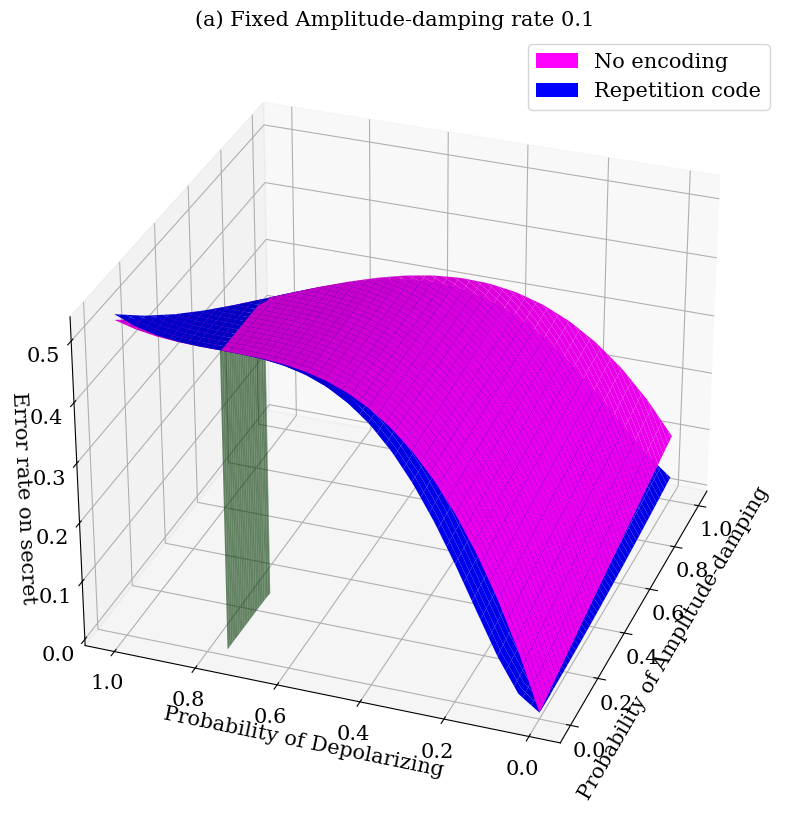

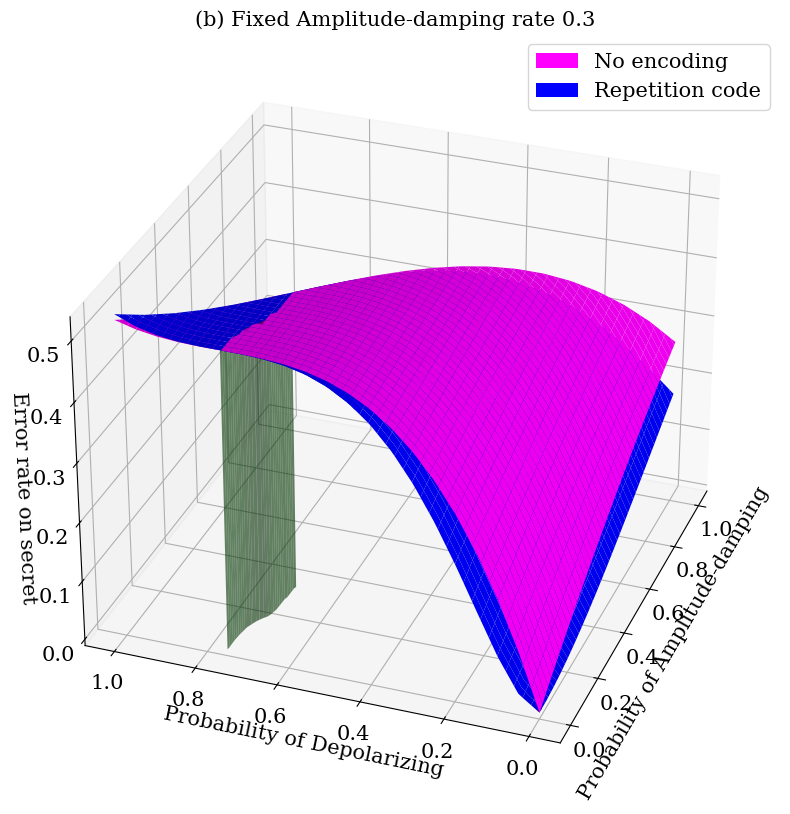

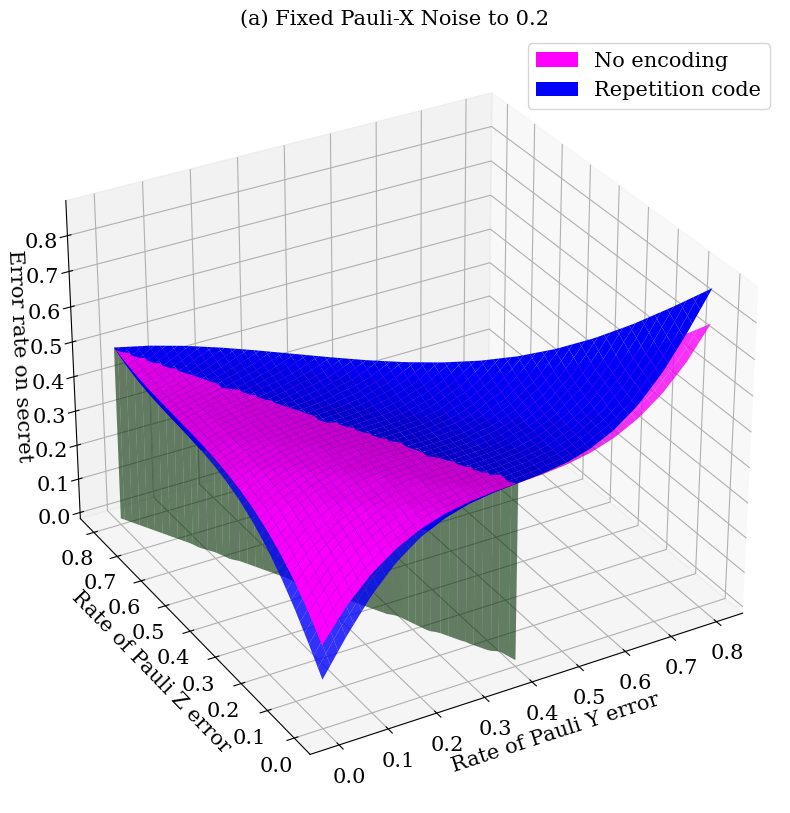

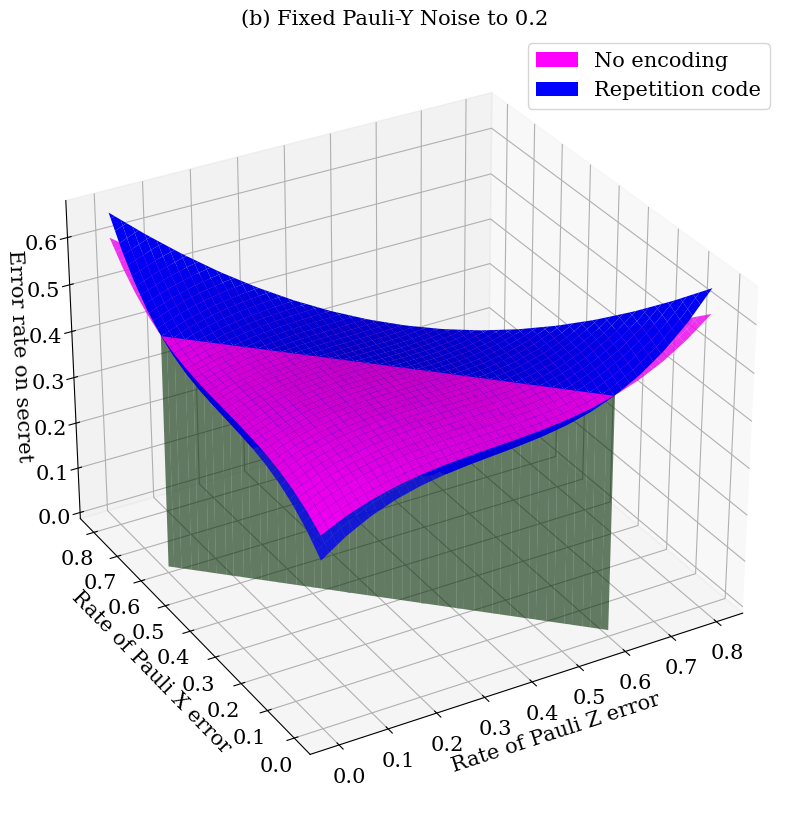

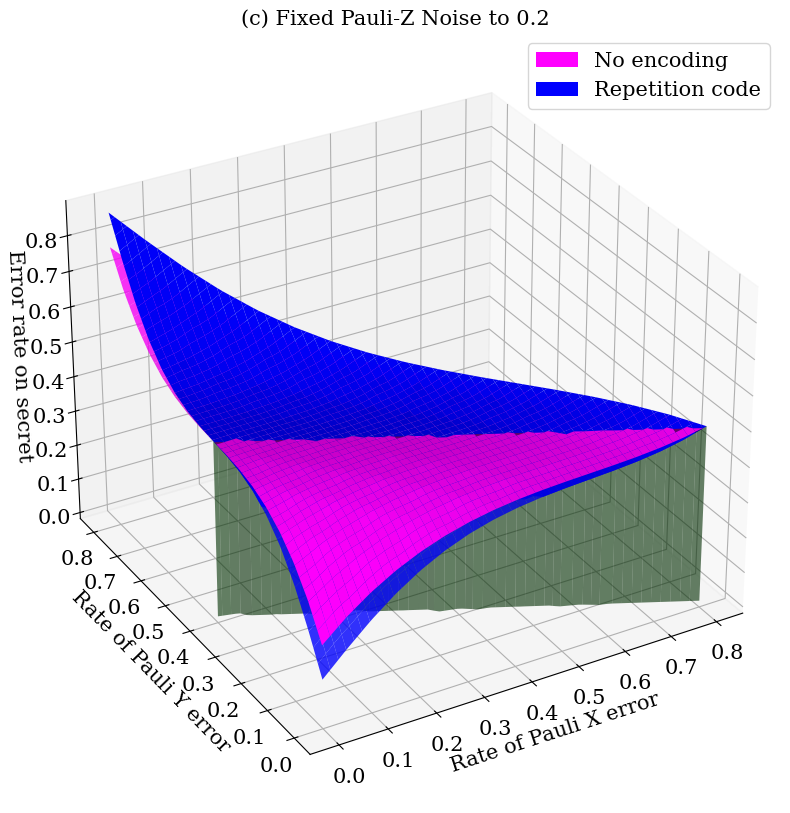

In [97]:
from math import sqrt
from itertools import product
from qiskit.quantum_info import DensityMatrix, Operator, Pauli

num_parties = [3, 4, 5, 6]  # Number of parties

Hadamard = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])  # Hadamard operator

for noise_type in ['X', 'Z', 'D', 'AD', 'PA', 'AP', 'DA', 'G'][6:]:
    # Noise types from ['X', 'Z', 'D', 'AD', 'PA', 'AP', 'DA', 'G'] for bit-flip, phase-flip, depolarizing,
    # amplitude-damping, phase-amplitude damping, amplitude-phase damping, depolarizing+amplitude damping,
    # generalized channel, respectively.
    num_params = 21 # Number of noise parameters
    # Noise parameters
    params = [i/(num_params-1) for i in range(num_params)]
    if noise_type == 'D':
        params = [p for p in params if p<=0.75]
    if noise_type in ['PA', 'AP']:
        params = list(product(params, params))
        num_parties = [3]
    if noise_type == 'DA':
        params = [p for p in list(product(params, repeat = 3)) if (p[1]+p[2])<=1]
        num_parties = [3]
    if noise_type == 'G':
        params = [p for p in list(product(params, repeat = 3)) if sum(p)<=1]
        num_parties = [3]

    damp_err_list = {}  # Contains calculated errors without QEC
    damp_err_lQEC = {}  # Contains calculated errors with QEC
    for num_party in num_parties:
        print(f'\nRunning {noise_type} noise for {num_party}-party QSSCM...')
        damp_err_list[num_party] = []
        damp_err_lQEC[num_party] = []
        for param in params:
            print(f'\tRunning for noise param: {param}...', end = '\r')
            err = []
            DM = DensityMatrix([1, 0])
            ops = ''
            for i in range(4*3**(num_party-2)*2):
                match i//(3**(num_party-2)*2):
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                        ops += 'I'
                    case 1:
                        DM = DM.evolve(Operator(Pauli('X')))
                        ops += 'X'
                    case 2:
                        DM = DM.evolve(Hadamard)
                        ops += 'H'
                    case 3:
                        DM = DM.evolve(Operator(Pauli('X'))).evolve(Hadamard)
                        ops += 'XH'
                DM = DM.evolve(get_noise(noise_type, param))
                j = i%(3**(num_party-2)*2)
                for party in range(num_party-2):
                    match j//(3**(num_party-3-party)*2):
                        case 0:
                            DM = DM.evolve(Operator(Pauli('I')))
                            ops += 'I'
                        case 1:
                            DM = DM.evolve(Operator(Pauli('Y')))
                            ops += 'Y'
                        case 2:
                            DM = DM.evolve(Hadamard)
                            ops += 'H'
                    DM = DM.evolve(get_noise(noise_type, param))
                    j = j%(3**(num_party-3-party)*2)
                match j:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('Y')))
                DM = DM.evolve(get_noise(noise_type, param))
                for op in ops[::-1]:
                    match op:
                        case 'I':
                            DM = DM.evolve(Operator(Pauli('I')))
                        case 'X':
                            DM = DM.evolve(Operator(Pauli('X')))
                        case 'Y':
                            DM = DM.evolve(Operator(Pauli('Y')))
                        case 'H':
                            DM = DM.evolve(Hadamard)
                        # case 'A':
                        #     DM = DM.evolve(Hadamard).evolve(Operator(Pauli('X')))
                ops = ''
                prob = DM.probabilities()
                err.append(float(1 - prob[i%2]))
                DM = DensityMatrix([1, 0])
            err = sum(err)/len(err)
            damp_err_list[num_party].append(err)
            damp_err_lQEC[num_party].append(3*err**2*(1-err)+err**3)
    # print(damp_err_list)

    match noise_type:
        case 'X':
            plot1D(params, (damp_err_list, damp_err_lQEC), 'Rate of Pauli noise', 'Error rate on secret', 'rep_X.png')
        case 'Z':
            plot1D(params, (damp_err_list, damp_err_lQEC), 'Rate of Pauli noise', 'Error rate on secret', 'rep_Z.png')
        case 'P':
            plot1D(params, (damp_err_list, damp_err_lQEC), 'Rate of Pauli noise', 'Error rate on secret', 'rep_P.png')
        case 'D':
            plot1D(params, (damp_err_list, damp_err_lQEC), 'Rate of Depolarizing', 'Error rate on secret', 'rep_dep.png')
        case 'AD':
            plot1D(params, (damp_err_list, damp_err_lQEC), 'Rate of Amplitude-damping', 'Error rate on secret', 'rep_AD.png')
        case 'PA':
            plot2D(params, (damp_err_list, damp_err_lQEC), 'Rate of Amplitude-damping', 'Rate of Phase-flip', 'Error rate on secret', 'rep_PA')
        case 'AP':
            plot2D(params, (damp_err_list, damp_err_lQEC), 'Rate of Amplitude-damping', 'Rate of Phase-flip', 'Error rate on secret', 'rep_AP')
        case 'DA':
            plotm(params, (damp_err_list, damp_err_lQEC), 'Rate of Amplitude-damping', 'Probability of Amplitude-damping', 'Rate of Depolarizing', 'rep_DA')
        case 'G':
            plot3D(params, (damp_err_list, damp_err_lQEC), r'$p_x$', r'$p_y$', r'$p_z$', 'rep_gen')

## Simulation with IBMQ

In [102]:
from qiskit import QuantumCircuit

qcs = []
for b in range(4):
	for c in range(3):
		for a in range(2):
			qc = QuantumCircuit(3)
			if b%2:
				qc.x(range(3))
			if b//2:
				qc.h(range(3))
			qc.barrier(range(3))
			if c%2:
				qc.y(range(3))
			if c//2:
				qc.h(range(3))
			qc.barrier(range(3))
			if a:
				qc.y(range(3))
			qc.barrier(range(3))
			if c//2:
				qc.h(range(3))
			if c%2:
				qc.y(range(3))
			qc.barrier(range(3))
			if b//2:
				qc.h(range(3))
			if b%2:
				qc.x(range(3))
			qc.barrier(range(3))
			qc.measure_all()
			qcs.append(qc.copy())

In [103]:
# from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeMarrakesh, FakeFez, FakeTorino, FakeBrisbane, FakeSherbrooke, FakeOsaka, FakePerth
# from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
from qiskit import transpile

backends = [FakeMarrakesh(), FakeFez(), FakeTorino(), FakeBrisbane(), FakeSherbrooke(), FakeOsaka()]

num_shots = 10**5
err_results = {}
for backend in backends:
	sim_back = AerSimulator.from_backend(backend)
	# # estimator = Estimator(backend)

	# # pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
	# # isa_circuit = pm.run(qcs)

	# job = sim_back.run(transpile(qcs, sim_back), shots = num_shots)
	# result = job.result()

	counts = sim_back.run(transpile(qcs, sim_back), shots = num_shots).result().get_counts()
	print(f'{backend.backend_name}: {counts}')

	err = 0
	err_QEC = 0
	for i in range(len(qcs)):
		for result, count in counts[i].items():
			if i%2:
				if result == '000':
					err += 3 * count
					err_QEC += count
				elif result in ['011', '101', '110']:
					err += count
				elif result in ['001', '010', '100']:
					err += 2 * count
					err_QEC += count
			else:
				if result == '111':
					err += 3 * count
					err_QEC += count
				elif result in ['011', '101', '110']:
					err += 2 * count
					err_QEC += count
				elif result in ['001', '010', '100']:
					err += count
	
	err_results[backend.backend_name] = [err / (3*len(qcs)*num_shots), err_QEC / (len(qcs)*num_shots)]

err_results

fake_marrakesh: [{'110': 1, '011': 3, '001': 270, '100': 344, '010': 264, '000': 99118}, {'100': 2, '010': 2, '110': 273, '101': 298, '011': 292, '111': 99133}, {'101': 1, '110': 1, '100': 295, '001': 308, '010': 302, '000': 99093}, {'010': 1, '001': 1, '101': 352, '110': 325, '011': 320, '111': 99001}, {'110': 1, '101': 1, '001': 314, '100': 308, '010': 309, '000': 99067}, {'010': 4, '001': 2, '110': 338, '101': 325, '011': 331, '111': 99000}, {'011': 1, '110': 1, '100': 336, '001': 283, '010': 294, '000': 99085}, {'001': 3, '101': 311, '110': 321, '011': 338, '111': 99027}, {'011': 2, '101': 1, '110': 1, '001': 329, '100': 367, '010': 365, '000': 98935}, {'010': 2, '001': 2, '110': 346, '101': 366, '011': 329, '111': 98955}, {'101': 1, '011': 1, '110': 3, '100': 380, '001': 334, '010': 343, '000': 98938}, {'100': 2, '001': 2, '101': 365, '110': 354, '011': 411, '111': 98866}, {'101': 1, '110': 1, '100': 315, '001': 301, '010': 302, '000': 99080}, {'001': 2, '110': 313, '101': 314, '0

{'fake_marrakesh': [0.003352916666666667, 3.25e-05],
 'fake_fez': [0.0026641666666666667, 1.9583333333333333e-05],
 'fake_torino': [0.006370138888888889, 0.00011666666666666667],
 'fake_brisbane': [0.007368888888888889, 0.00015333333333333334],
 'fake_sherbrooke': [0.0045518055555555555, 5.25e-05],
 'fake_osaka': [0.005353055555555555, 7.416666666666666e-05]}

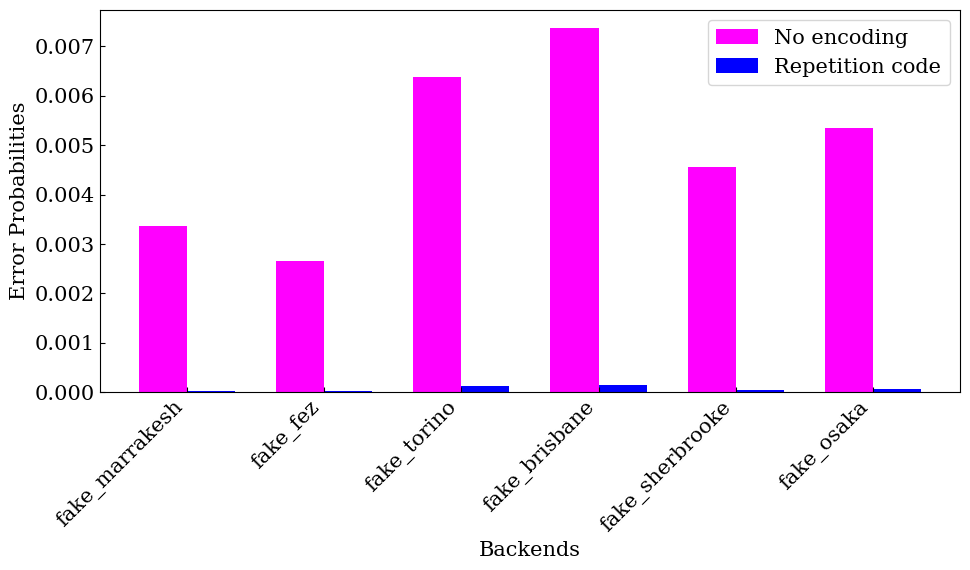

In [105]:
from numpy import arange
from matplotlib.pyplot import subplots, savefig, tight_layout, rc, rcParams

# Configure plotting parameters
SIZE = 15
rc('font', size = SIZE)
rc('axes', titlesize=SIZE)
rcParams["figure.figsize"] = (13, 10)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']

# Extract keys and values
keys = list(err_results.keys())
values1 = [v[0] for v in err_results.values()]
values2 = [v[1] for v in err_results.values()]

x = arange(len(keys))  # positions for bars
width = 0.35  # bar width

# Plot grouped bar chart
fig, ax = subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, values1, width, label='No encoding', color = '#f0f')
bars2 = ax.bar(x + width/2, values2, width, label='Repetition code', color = '#00f')

# Add labels and formatting
ax.set_ylabel('Error Probabilities')
ax.set_xlabel('Backends')
# ax.set_title('Grouped Bar Chart of Dictionary Values')
ax.set_xticks(x)
ax.set_xticklabels(keys, rotation=45, ha='right')
ax.legend()

tight_layout()

ax.tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('IBM_back.png', format="png", bbox_inches="tight")

## Existing QEC

In [32]:
from typing import List, Dict

def combine_k_dicts_at_index(dicts: List[Dict[str, float]], i: int) -> Dict[str, float]:
    """
    Arguments:
        dicts: list of k dictionaries. Each dict maps n-bit strings (composed of '0'/'1') to probabilities.
        i: 0-based index of the bit to fix (0 <= i < n).
    Returns: dict mapping k-bit strings (e.g. '0101' for k=4) to probabilities.
    """
    from itertools import product

    if not dicts:
        raise ValueError("dicts must be a non-empty list")
    k = len(dicts)
    # validate key lengths and characters
    n = len(next(iter(dicts[0])))
    if not (0 <= i < n):
        raise ValueError("i out of range (0-based).")
    for d in dicts:
        if not d:
            raise ValueError("Each dictionary must be non-empty")
        if any(len(k0) != n or set(k0) - {'0','1'} for k0 in d):
            raise ValueError("All dictionaries must have keys that are n-bit strings of '0'/'1' and same n")

    # compute S_j for each dictionary: a list of dicts [{'0': s0, '1': s1}, ...]
    Sj_list = []
    for d in dicts:
        s = {'0': 0.0, '1': 0.0}
        for key, p in d.items():
            s[key[i]] += p
        Sj_list.append(s)

    # build result: all k-bit strings
    result = {}
    for bits in product('01', repeat=k):
        key = ''.join(bits)
        prob = 1.0
        for j, bit in enumerate(bits):
            prob *= Sj_list[j][bit]
        result[key] = prob

    return result

def measure_generators(DM: DensityMatrix, stabilizer_generators: list):
    '''Measure stabilizer generators
    Arguments:
        DM: Logical state after time evaluation
        stabilizer_generators: List of all stabilizer generators as a string of I, X, Y, Z
    Returns:
        Measurement results with probabilities
    '''
    
    from math import log2
    from qiskit import QuantumCircuit
    from qiskit.quantum_info import Operator, DensityMatrix
    
    num_physical_qubits = len(stabilizer_generators[0])    # Number of physical qubits in a single Logical qubit
    num_ancillas = int(log2(DM.dim)//num_physical_qubits)    # Number of ancilla qubits (1 or 2)
    
    # Add ancilla qubit
    DM = DensityMatrix([1] + [0]*(2**num_ancillas-1)).expand(DM)
    
    results = []    # Measurement result
    for generator in stabilizer_generators:
        generator = generator[::-1]
        # Create coresponding quantum circuit
        qc = QuantumCircuit(log2(DM.dim))
        qc.h(range(num_ancillas))

        # Apply controlled gates
        for j in range(len(generator)):
            for i in range(num_ancillas):
                if generator[j] == 'X':
                    qc.cx(i, j+num_ancillas+i*num_physical_qubits)
                if generator[j] == 'Z':
                    qc.cz(i, j+num_ancillas+i*num_physical_qubits)
    
        qc.h(range(num_ancillas))
    
        # Apply the operation and measure the ancilla qubit
        results.append(DM.evolve(Operator(qc)).probabilities_dict(range(num_ancillas)))

    return combine_k_dicts_at_index(results, 0)

In [33]:
def stab_to_enc(stabilizers: list, LogicalX: str):
	'''
    Create a unitary encoder from stabilizer generators for [[n, 1, d]] code.
    Arguments:
        stabilizers: list of strings of length n, each in {'I','X','Y','Z'}.
                     Example: ["ZZI", "IZZ"] for 3-qubit repetition code.
		LogicalX: Logical X operator.

    Returns: Unitary encoder.
	'''
	from qiskit.quantum_info import  Operator, Pauli, Statevector
	from numpy import zeros, sqrt, vdot, column_stack
	from numpy.linalg import norm, qr
	from numpy.random import randn

	n = len(stabilizers[0])
	dim = 2**n

	sv = Statevector([1] + [0]*(2**n-1))
	for stab in stabilizers:
		sv = Statevector(sv.data + sv.evolve(Operator(Pauli(stab))).data)

	i = 0
	S0 = []
	for i in range(2**n):
		if sv.data[i]:
			S0.append(i)
	
	sv = sv.evolve(Operator(Pauli(LogicalX)))

	i = 0
	S1 = []
	for i in range(2**n):
		if sv.data[i]:
			S1.append(i)
	
	# Step 1: create normalized vectors
	v0 = zeros(dim, dtype = complex)
	v1 = zeros(dim, dtype = complex)
	v0[S0] = 1.0/sqrt(len(S0))
	v1[S1] = 1.0/sqrt(len(S1))

	# Gram-Schmidt for safety (v1 orthogonal to v0)
	v1 -= vdot(v0, v1) * v0
	v1 /= norm(v1)

	# Step 2: create a random matrix for the remaining columns
	# Make sure it's full-rank and complex
	rest = randn(dim, dim-2) + 1j*randn(dim, dim-2)

	# Step 3: combine columns
	cols = column_stack([v0, v1, rest])

	# Step 4: QR decomposition to get full orthonormal unitary
	U, _ = qr(cols)
	# U is now a unitary (orthonormal columns)

	return U

def get_encoder(QEC: str):
	'''
	Create unitary encoder for a CSS code
	Arguments:
		QEC: Name of the code from ['Surface3', 'Steane'].
	Returns: Unitary encoder.
	'''

	match QEC:
		case 'Surface3':
			from panqec.codes.surface_2d import RotatedPlanar2DCode
			from numpy import where

			code = RotatedPlanar2DCode(3)

			stabilizers = [''.join(row) for row in where(code.Hx.toarray() == 1, 'X', 'I')] +\
						  [''.join(row) for row in where(code.Hz.toarray() == 1, 'Z', 'I')]
			
			LogicalX = ''.join(['X' if p==1 else 'I' for p in code.logicals_x[0][:9]])
		case 'Steane':
			stabilizers = ['IIXIXXX', 'IXIXIXX', 'XIIXXIX', 'IIZIZZZ', 'IZIZIZZ', 'ZIIZZIZ']
			LogicalX = 'X'*7
		case default:
			raise NotImplementedError('This code has not been implemented yet')

	return stab_to_enc(stabilizers, LogicalX)

In [34]:
def mip_decode(syndrome, stabilizers):
    """
    Decode given a syndrome using Python-MIP.
    Arguments:
        syndrome: list/tuple of 0/1 of length = len(stabilizers)
        stabilizers: list of lists of qubit indices
    Returns: list of qubits to flip
    """
    from mip import Model, xsum, BINARY, INTEGER
    
    n_qubits = len(stabilizers[0])

    m = Model(sense="MIN", solver_name="cbc")
    m.verbose = 0

    # binary variables: error on qubit?
    x = [m.add_var(var_type=BINARY) for _ in range(n_qubits)]

    # integer slack variables for parity constraints
    y = [m.add_var(var_type=INTEGER, lb=0) for _ in range(len(stabilizers))]

    # objective: minimize weight
    m.objective = xsum(x)

    # constraints: stabilizer parity = syndrome + 2*y
    for j, stab in enumerate(stabilizers):
        m += xsum(x[q] for q in range(len(stab)) if stab[q] != 'I') == int(syndrome[j]) + 2*y[j]

    m.optimize()

    correction = [q for q in range(n_qubits) if x[q].x >= 0.5]
    return correction

In [35]:
class Surface_3_code:
	from qiskit.quantum_info import DensityMatrix
	def __init__(self):
		from numpy import where
		from panqec.codes.surface_2d import RotatedPlanar2DCode

		code = RotatedPlanar2DCode(3)

		self.generators = [''.join(row) for row in where(code.Hx.toarray() == 1, 'X', 'I')] +\
						  [''.join(row) for row in where(code.Hz.toarray() == 1, 'Z', 'I')]    # Stabilizer generator for 2 logical qubits
		self.num_physical_qubits = code.d ** 2    # per logical qubit
		# self.codebook = get_codebook(self.generators)    # Syndrome measurement: Correction operation
		self.encoder = get_encoder('Surface3')
		pass

	def reconstruct(self, DM: DensityMatrix):
		'''
		Reconstructs the logical state correcting errors
		Arguments:
			DM: Logical state after time evaluation
		Returns: Reconstructed logical state as DensityMatrix
		'''

		from qiskit.quantum_info import Operator, Pauli

		# Syndrome measurements
		syndrome_results = measure_generators(DM, self.generators)

		# Get correction operations
		dm = DensityMatrix([0] * DM.dim)
		for syndrome, prob in syndrome_results.items():
			correction_X = mip_decode(syndrome[4:], self.generators[4:])
			correction_X = ''.join(['X' if i in correction_X else 'I' for i in range(self.num_physical_qubits)])
			correction_Z = mip_decode(syndrome[:4], self.generators[:4])
			correction_Z = ''.join(['Z' if i in correction_Z else 'I' for i in range(self.num_physical_qubits)])
			dm += prob * DM.evolve(Operator(Pauli(correction_X))).evolve(Operator(Pauli(correction_Z)))
		# result = results[-1]
		# op = Operator(Pauli(self.codebook[8*int(result[:3], 2)]))@Operator(Pauli(self.codebook[int(result[3:], 2)]))
		# for result in results[-2::-1]:
		# 	op = (Operator(Pauli(self.codebook[8*int(result[:3], 2)]))@Operator(Pauli(self.codebook[int(result[3:], 2)]))).tensor(op)

		# # Apply correction Operations
		# DM = DM.evolve(op)

		return dm
	
	def decode(self, DM: DensityMatrix):
		'''
		Decodes the encoded information
		Arguments:
			DM: Logical state after time evaluation
		Returns: Decoded physical state as DensityMatrix
		'''

		from qiskit.quantum_info import partial_trace

		return partial_trace(DM.evolve(Operator(self.encoder.T.conj())), range(1, self.num_physical_qubits))

In [36]:
class Steane_code:
	from qiskit.quantum_info import DensityMatrix
	def __init__(self):
		self.num_physical_qubits = 7    # per logical qubit
		self.generators = ['IIXIXXX', 'IXIXIXX', 'XIIXXIX', 'IIZIZZZ', 'IZIZIZZ', 'ZIIZZIZ']    # Stabilizer generator
		self.encoder = get_encoder('Steane')
		pass

	def reconstruct(self, DM: DensityMatrix):
		'''
		Reconstructs the logical state correcting errors
		Arguments:
			DM: Logical state after time evaluation
		Returns: Reconstructed logical state as DensityMatrix
		'''

		from qiskit.quantum_info import Operator, Pauli

		# Syndrome measurements
		syndrome_results = measure_generators(DM, self.generators)

		# Get correction operations
		dm = DensityMatrix([0] * DM.dim)
		for syndrome, prob in syndrome_results.items():
			correction_X = mip_decode(syndrome[3:], self.generators[3:])
			correction_X = ''.join(['X' if i in correction_X else 'I' for i in range(self.num_physical_qubits)])
			correction_Z = mip_decode(syndrome[:3], self.generators[:3])
			correction_Z = ''.join(['Z' if i in correction_Z else 'I' for i in range(self.num_physical_qubits)])
			dm += prob * DM.evolve(Operator(Pauli(correction_X))).evolve(Operator(Pauli(correction_Z)))
		return dm
	
	def decode(self, DM: DensityMatrix):
		'''
		Decodes the encoded information
		Arguments:
			DM: Logical state after time evaluation
		Returns: Decoded physical state as DensityMatrix
		'''

		from qiskit.quantum_info import partial_trace

		return partial_trace(DM.evolve(Operator(self.encoder.T.conj())), range(1, self.num_physical_qubits))

In [37]:
class five_qubit_code:
    def __init__(self):
        self.num_physical_qubits = 5    # per logical qubit
        self._get_correction_ops()
        pass
    
    def encode(self, DM, inverse = False):
        '''Encoding for [[5,1,3]] code from [PhysRevLett.77.198]
        Arguments:
            DM [<DensityMatrix>]: Logical state after time evaluation
            inverse [bool]: Switches between encoding and decoding
        Returns:
            Encoded Logical state
        '''

        from math import log2
        from qiskit import QuantumCircuit
        from qiskit.circuit.library import MCMT
        from qiskit.quantum_info import Operator, DensityMatrix

        num_logical_qubits = int(log2(DM.dim)//self.num_physical_qubits)    # Number of Logical qubits (1 or 2)

        # Initialize the circuit
        qc = QuantumCircuit(self.num_physical_qubits*num_logical_qubits)

        if not inverse:
            num_logical_qubits = int(log2(DM.dim))

            # Initialize the circuit
            qc = QuantumCircuit(self.num_physical_qubits*num_logical_qubits)
            
            # Append ancilas
            anc = DensityMatrix([1] + [0]*(2**(~-self.num_physical_qubits*num_logical_qubits)-1))
            DM = DM.expand(anc)

            # Main physical qubit would be in the middle of each logical qubits
            for i in range(num_logical_qubits)[::-1]:
                qc.swap(i, self.num_physical_qubits*i+self.num_physical_qubits//2)

        # Encoding
        for i in range(num_logical_qubits):
            qc.h([1+self.num_physical_qubits*i, 3+self.num_physical_qubits*i, 4+self.num_physical_qubits*i])
            qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.x([3+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.x([3+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.cx([2+self.num_physical_qubits*i, 4+self.num_physical_qubits*i, 4+self.num_physical_qubits*i, 1+self.num_physical_qubits*i, 3+self.num_physical_qubits*i], [0+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 0+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 0+self.num_physical_qubits*i])
            qc.cz(1+self.num_physical_qubits*i, 0+self.num_physical_qubits*i)
            qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.x([3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
            qc.x([3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])

        # Convert the circuit into a Operator
        op = Operator(qc)
        if inverse:
            op = Operator(qc.inverse())
        return DM.evolve(op)
    
    def reconstruct(self, DM):
        '''Reconstructs the logical state correcting errors
        Arguments:
            DM [<DensityMatrix>]: Logical state after time evaluation
        Returns:
            Reconstructed logical state as DensityMatrix
        '''

        from math import log2
        from itertools import product
        from qiskit.quantum_info import Operator, Pauli, DensityMatrix, partial_trace

        num_logical_qubits = int(log2(DM.dim)//self.num_physical_qubits)    # Number of Logical qubits (1 or 2)
        
        # Decode the logical state
        DM = self.encode(DM, True)
        
        # Correction operations
        correction_ops = list(product(self.correction_ops, repeat = num_logical_qubits))
        
        # Apply correction operations
        correction_op = correction_ops[0][0]
        for op in correction_ops[0][1:]:
            correction_op = correction_op.tensor(op)
        rho = DM.evolve(correction_op).data
        for ops in correction_ops[1:]:
            correction_op = ops[0]
            for op in ops[1:]:
                correction_op = correction_op.tensor(op)
            rho += DM.evolve(correction_op).data
        DM = DensityMatrix(rho)
        
        # Remove the ancillas
        for i in range(num_logical_qubits)[::-1]:
            DM = partial_trace(DM, [0+self.num_physical_qubits*i, 1+self.num_physical_qubits*i, 3+self.num_physical_qubits*i, 4+self.num_physical_qubits*i])
        
        # Reconstruct the Logical state and return
        return self.encode(DM)

    def _get_correction_ops(self):
        '''Calculates correction operations for single logical qubit'''
        
        from qiskit.quantum_info import Operator, Pauli
        
        Op = [Operator([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]),
              Operator([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]),
              Operator([[0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]),
              Operator([[0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])]    # Error detection operations
        
        ops = []
        for i in range(16):
            # Traverse through all possible errors
            c = f'{bin(i)}'[2:]
            r = 4 - len(c)
            for _ in range(r):
                c = '0' + c

            # Get Pauli correction operation
            if i in [0, 2, 3, 4, 8]:
                # No error
                pauli = Pauli('I')
            elif i in [9, 10, 12, 15]:
                # Phase-flip error
                pauli = Pauli('Z')
            elif i in [6, 7, 11, 14]:
                # Bit-flip error
                pauli = Pauli('X')
            else:
                # Bit-phase-flip error
                pauli = Pauli('X').compose(Pauli('Z'))

            # Detect error and get correction operatios
            ops.append(Op[int(c[:2], 2)].tensor(pauli).tensor(Op[int(c[2:], 2)]))
        
        self.correction_ops = ops

In [53]:
class four_qubit_code:
    def __init__(self):
        self.num_qubit = 4
        self.enc_op = self._get_enc_op()    #Encoding operator
        self.synd_op = self._get_synd_op()    #Syndrome measurement operator
        self.cor_op = None    #Correction operator
        pass
    
    def _get_enc_op(self):
        '''Creates Encoding operator'''
        
        from qiskit import QuantumCircuit
        from qiskit.quantum_info import Operator
        
        # Create corresponding quantum circuit
        qc = QuantumCircuit(self.num_qubit)
        
        # Encode operations
        qc.h(0)
        qc.cx([3, 0, 0, 0], [2, 1, 2, 3])
        
        return Operator(qc)
    
    def _get_synd_op(self):
        '''Creates syndrome measurement operation'''
        
        from qiskit import QuantumCircuit
        from qiskit.quantum_info import Operator
        
        # Create corresponding quantum circuit
        qc = QuantumCircuit(self.num_qubit)
        
        # Apply operations
        qc.cx([0, 3], [1, 2])
        
        return Operator(qc)
    
    def get_cor_op(self, gamma):
        '''Creates correction operation
        gamma [float]: Damping probability
        '''
        
        from numpy import arctan, arccos, pi
        from qiskit import QuantumCircuit
        from qiskit.quantum_info import Operator
        
        self.cor_op = []
        for i in range(3):
            if not i:
                theta = arctan((1-gamma)**2)
                qc = QuantumCircuit(2)
                qc.cx(1, 0)
                qc.ry(2*theta, 1)
                qc.cry(pi/2-2*theta, 0, 1)
                self.cor_op.append(Operator(qc))
            elif not ~-i:
                theta = arccos(1-gamma)
                qc = QuantumCircuit(3)
                qc.x(2)
                qc.cry(theta, 2, 0)
                self.cor_op.append(Operator(qc))
            elif not ~-~-i:
                theta = arccos(1-gamma)
                qc = QuantumCircuit(3)
                qc.x(1)
                qc.cry(theta, 1, 0)
                self.cor_op.append(Operator(qc))
        pass
    
    def encode(self, DM):
        '''Encodes physical qubit to logical qubit
        DM [<DensityMatrix>]: Physical state as DensityMatrix
        
        Returns: Logical state as DensityMatrix
        '''
        
        anc = [1] + [0] * ~-2**(~-self.num_qubit)
        ancilla = DensityMatrix(anc)
        state_exp = ancilla.expand(DM)
        return state_exp.evolve(self.enc_op)
    
    def correct(self, DM):
        '''Corrects logical qubit and returns corresponding physical qubit
        DM [<DensityMatrix>]: Logical state as DensityMatrix
        
        Returns: Physical state as DensityMatrix
        '''
        from qiskit.quantum_info import partial_trace

        # Syndrome measurement
        num_shots = 1000
        dm = DensityMatrix([0, 0])
        for _ in range(num_shots):
            synd_res, DM0 = DM.evolve(self.synd_op).measure([1, 2])
            DM0 = partial_trace(DM0, [1, 2])
            
            # Apply correction operation
            if not int(synd_res, 2):
                DM0 = DM0.evolve(self.cor_op[int(synd_res, 2)])
                DM0 = partial_trace(DM0.measure([1])[1], [1])
            elif not ~-int(synd_res, 2):
                DM0 = DensityMatrix([1, 0]).expand(DM0).evolve(self.cor_op[int(synd_res, 2)])
                DM0 = partial_trace(DM0.measure([0])[1], [0, 1])
            elif not ~-~-int(synd_res, 2):
                DM0 = DensityMatrix([1, 0]).expand(DM0).evolve(self.cor_op[int(synd_res, 2)])
                DM0 = partial_trace(DM0.measure([0])[1], [0, 2])
            else:
                DM0 = partial_trace(DM0.measure([1])[1], [1])
            dm += DM0
		
        return dm/num_shots

In [98]:
def plot_QEC(params: list, errs: dict, xlabel: str, ylabel: str, filename: str):
	'''
	Plots the error data
	Arguments:
		params: Noise parameters
		errs: Error values
		xlabel: Label for X axis
		ylabel: Label for Y axis
		filename: File to save picture
	Return: None
	'''
	from matplotlib.pyplot import subplots, savefig, subplots_adjust, rcParams
	from matplotlib import rc
	from string import ascii_lowercase

	# Configure plotting parameters
	SIZE = 25
	rc('font', size = SIZE)
	rc('axes', titlesize=SIZE)
	rcParams["figure.figsize"] = (13, 10)
	rcParams['font.family'] = 'serif'
	rcParams['font.serif'] = ['Arial'] + rcParams['font.serif']

	# damp_err_list, damp_err_lQEC = err	# Unpack error
	# num_parties = list(damp_err_list.keys())

	# Initialize subplot
	_, ax = subplots(1, 1)

	for (label, err), marker in zip(errs.items(), ['o', 's', 'D', '*', 'v', 'p']):
		match label:
			case None:
				label = 'No encoding'
				color = '#f0f'
				ls = '-'
			case 'Repetition':
				label += ' code'
				color = '#00f'
				ls = '--'
			case 'Four-qubit':
				label += ' code'
				color = '#000'
				ls = ':'
			case 'Five-qubit':
				label += ' code'
				color = '#f00'
				ls = '-.'
			case 'Steane':
				label += ' code'
				color = '#aa0'
			case 'Surface':
				label += ' code'
				color = '#090'
		ax.plot(params, err, label = label, color = color, ls = ls)

		ax.set_xlabel(xlabel)
		ax.set_ylabel(ylabel)

		ax.legend()

		ax.tick_params(axis = 'both', which = 'both', direction = 'in')

	savefig(filename, format="png", bbox_inches="tight")


Running AD noise for None code with 3-party QSSCM...
{None: [1.850371707708594e-17], 'Repetition': [1.0271626370065257e-33]}
{None: [1.850371707708594e-17, 0.05426757373893959], 'Repetition': [1.0271626370065257e-33, 0.00851527597307432]}
{None: [1.850371707708594e-17, 0.05426757373893959, 0.10466138267401177], 'Repetition': [1.0271626370065257e-33, 0.00851527597307432, 0.03056909244660791]}
{None: [1.850371707708594e-17, 0.05426757373893959, 0.10466138267401177, 0.15131794626839865], 'Repetition': [1.0271626370065257e-33, 0.00851527597307432, 0.03056909244660791, 0.06176187197979551]}
{None: [1.850371707708594e-17, 0.05426757373893959, 0.10466138267401177, 0.15131794626839865, 0.1943735910133478], 'Repetition': [1.0271626370065257e-33, 0.00851527597307432, 0.03056909244660791, 0.06176187197979551, 0.0986559852579526]}
{None: [1.850371707708594e-17, 0.05426757373893959, 0.10466138267401177, 0.15131794626839865, 0.1943735910133478, 0.23396438372454845], 'Repetition': [1.027162637006525

/tmp/ipykernel_33433/1027498003.py:43: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of Qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
/tmp/ipykernel_33433/1027498003.py:45: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of Qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  qc.append(MCMT('z', 2, 1), [3+self.num_physical_qubits*i, 2+self.num_physical_qubits*i, 1+self.num_physical_qubits*i])
/tmp/ipykernel_33433/1027498003.py:49: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of Qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  qc.append(MCMT('z'

{None: [1.850371707708594e-17, 0.05426757373893959, 0.10466138267401177, 0.15131794626839865, 0.1943735910133478, 0.23396438372454845, 0.27022604582088194, 0.3032938419046301, 0.3333024329986061, 0.36038568018206824, 0.38467637695973345, 0.406305876370161, 0.4254035574373049, 0.4420960364866704, 0.4565059529434519, 0.46874999999999917, 0.47893550149833414, 0.48715385725706667, 0.49346601409470464, 0.49786085860255164, 0.49999999999999956], 'Repetition': [1.0271626370065257e-33, 0.00851527597307432, 0.03056909244660791, 0.06176187197979551, 0.0986559852579526, 0.13860389000258458, 0.1796013922781387, 0.22016318860084474, 0.259218059767846, 0.2960212891182823, 0.33008206726062445, 0.36110381892440485, 0.388935539247375, 0.41353234353739354, 0.43492348758768323, 0.4531860351562488, 0.4684219454352404, 0.4807350257134775, 0.4901995790526091, 0.49679130748093253, 0.49999999999999933], 'Four-qubit': [2.7755575615628914e-17, 0.012429096551671126, 0.04762799516195696, 0.09699168366885273, 0.15

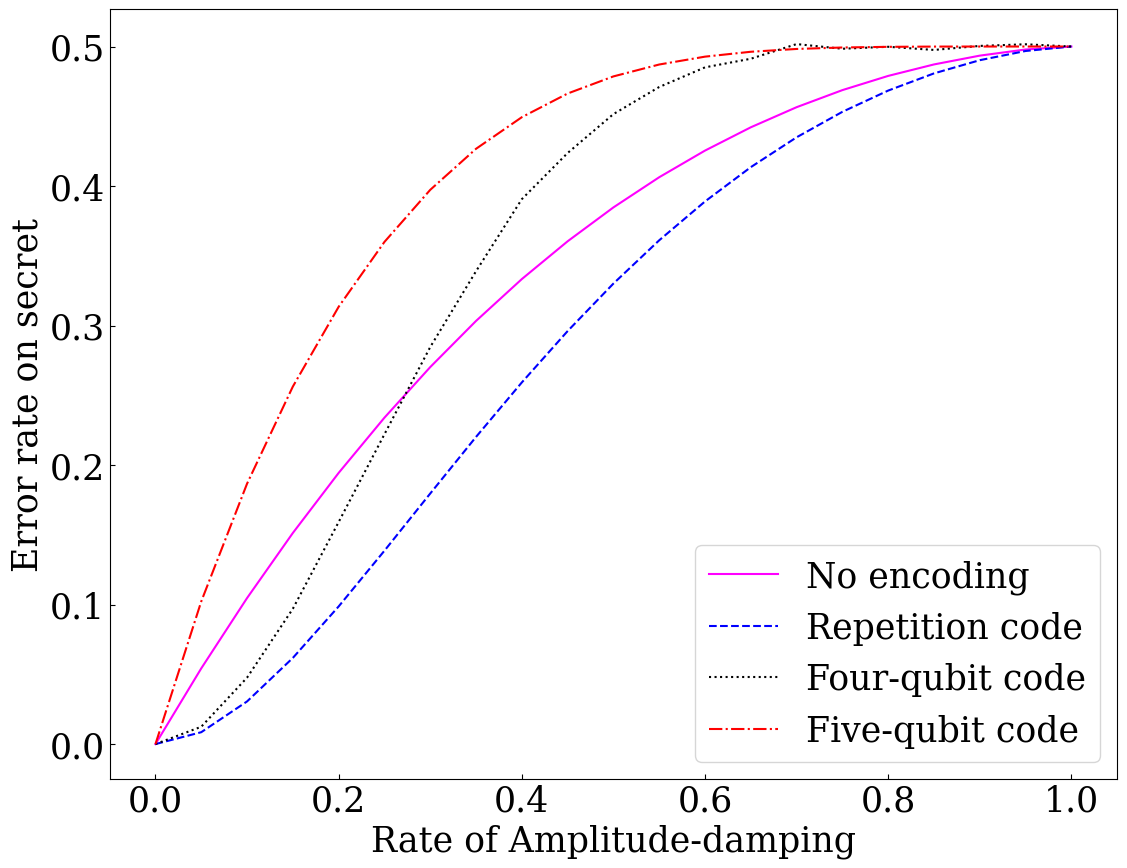

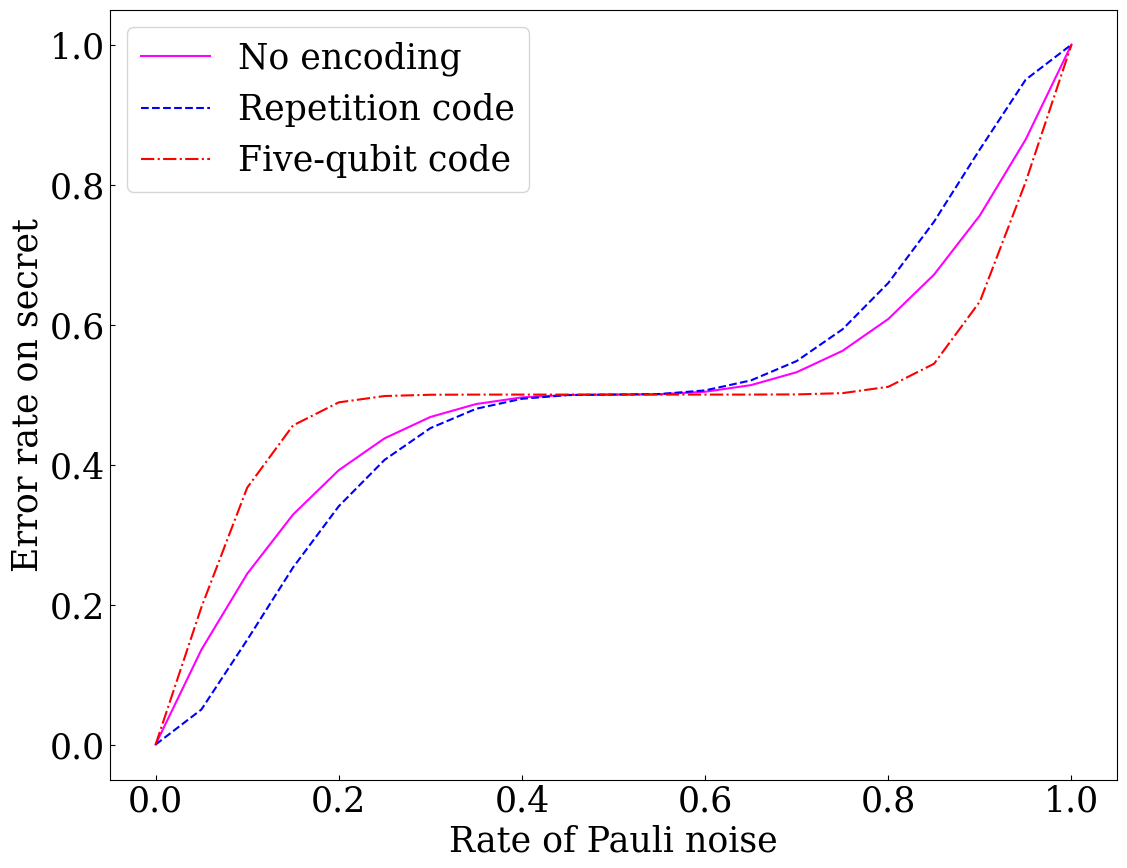

In [ ]:
from math import sqrt
from itertools import product
from qiskit.quantum_info import DensityMatrix, Operator, Pauli, partial_trace

Hadamard = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])  # Hadamard operator

num_party = 3

for noise_type in ['AD', 'P']:
    # Noise types from ['P', 'AD'] for pauli and amplitude-phase damping, respectively.
    num_params = 21 # Number of noise parameters
    # Noise parameters
    params = [i/(num_params-1) for i in range(num_params)]

    damp_err_list = {None: [], 'Repetition': []}  # Contains calculated errors
    for QEC in [None, 'Four-qubit', 'Five-qubit']:#, 'Steane', 'Surface']:
        damp_err_list[QEC] = []
        print(f'\nRunning {noise_type} noise for {QEC} code with 3-party QSSCM...')
        match QEC:
            case 'Four-qubit':
                code = four_qubit_code()
            case 'Five-qubit':
                code = five_qubit_code()
            case 'Steane':
                code = Steane_code()
            case 'Surface':
                code = Surface_3_code()
        for param in params:
            print(f'\tRunning for noise param: {param}...', end = '\r')
            if QEC == 'Four-qubit':
                code.get_cor_op(param)
            err = []
            DM = DensityMatrix([1, 0])
            ops = ''
            for i in range(4*3**(num_party-2)*2):
                match i//(3**(num_party-2)*2):
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                        ops += 'I'
                    case 1:
                        DM = DM.evolve(Operator(Pauli('X')))
                        ops += 'X'
                    case 2:
                        DM = DM.evolve(Hadamard)
                        ops += 'H'
                    case 3:
                        DM = DM.evolve(Operator(Pauli('X'))).evolve(Hadamard)
                        ops += 'XH'
                if QEC in ['Steane', 'Surface']:
                    DM = DM.expand(DensityMatrix([1] + [0] * (2**(code.num_physical_qubits-1)-1)))
                    DM = DM.evolve(Operator(code.encoder))
                    DM = DM.evolve(get_noise(noise_type, param, code.num_physical_qubits))
                    DM = code.reconstruct(DM)
                    DM = code.decode(DM)
                elif QEC == 'Five-qubit':
                    DM = code.encode(DM).evolve(get_noise(noise_type, param, 5))
                    DM = partial_trace(code.encode(code.reconstruct(DM), True), [0, 1, 3, 4])
                elif QEC == 'Four-qubit':
                    DM = code.encode(DM).evolve(get_noise(noise_type, param, 4))
                    DM = code.correct(DM)
                elif QEC == None:
                    DM = DM.evolve(get_noise(noise_type, param))
                j = i%(3**(num_party-2)*2)
                for party in range(num_party-2):
                    match j//(3**(num_party-3-party)*2):
                        case 0:
                            DM = DM.evolve(Operator(Pauli('I')))
                            ops += 'I'
                        case 1:
                            DM = DM.evolve(Operator(Pauli('Y')))
                            ops += 'Y'
                        case 2:
                            DM = DM.evolve(Hadamard)
                            ops += 'H'
                    if QEC in ['Steane', 'Surface']:
                        DM = DM.expand(DensityMatrix([1] + [0] * (2**(code.num_physical_qubits-1)-1)))
                        DM = DM.evolve(Operator(code.encoder))
                        DM = DM.evolve(get_noise(noise_type, param, code.num_physical_qubits))
                        DM = code.reconstruct(DM)
                        DM = code.decode(DM)
                    elif QEC == 'Five-qubit':
                        DM = code.encode(DM).evolve(get_noise(noise_type, param, 5))
                        DM = partial_trace(code.encode(code.reconstruct(DM), True), [0, 1, 3, 4])
                    elif QEC == 'Four-qubit':
                        DM = code.encode(DM).evolve(get_noise(noise_type, param, 4))
                        DM = code.correct(DM)
                    elif QEC == None:
                        DM = DM.evolve(get_noise(noise_type, param))
                    j = j%(3**(num_party-3-party)*2)
                match j:
                    case 0:
                        DM = DM.evolve(Operator(Pauli('I')))
                    case 1:
                        DM = DM.evolve(Operator(Pauli('Y')))
                if QEC in ['Steane', 'Surface']:
                    DM = DM.expand(DensityMatrix([1] + [0] * (2**(code.num_physical_qubits-1)-1)))
                    DM = DM.evolve(Operator(code.encoder))
                    DM = DM.evolve(get_noise(noise_type, param, code.num_physical_qubits))
                    DM = code.reconstruct(DM)
                    DM = code.decode(DM)
                elif QEC == 'Five-qubit':
                    DM = code.encode(DM).evolve(get_noise(noise_type, param, 5))
                    DM = partial_trace(code.encode(code.reconstruct(DM), True), [0, 1, 3, 4])
                elif QEC == 'Four-qubit':
                    DM = code.encode(DM).evolve(get_noise(noise_type, param, 4))
                    DM = code.correct(DM)
                elif QEC == None:
                    DM = DM.evolve(get_noise(noise_type, param))
                for op in ops[::-1]:
                    match op:
                        case 'I':
                            DM = DM.evolve(Operator(Pauli('I')))
                        case 'X':
                            DM = DM.evolve(Operator(Pauli('X')))
                        case 'Y':
                            DM = DM.evolve(Operator(Pauli('Y')))
                        case 'H':
                            DM = DM.evolve(Hadamard)
                ops = ''
                prob = DM.probabilities()
                err.append(float(1 - prob[i%2]))
                DM = DensityMatrix([1, 0])
            err = sum(err)/len(err)
            if QEC == None:
                damp_err_list['Repetition'].append(3*err**2*(1-err)+err**3)
            damp_err_list[QEC].append(err)
            print(damp_err_list)
    
    if noise_type == 'AD':
        plot_QEC(params, damp_err_list, 'Rate of Amplitude-damping', 'Error rate on secret', 'QEC_amp.png')
    if noise_type == 'P':
        del damp_err_list['Four-qubit']
        plot_QEC(params, damp_err_list, 'Rate of Pauli noise', 'Error rate on secret', 'QEC_flip.png')